## Stability in the BKY Model

In [1]:
include("src/utilities.jl")
include("src/bansal_yaron_discretized.jl")

compute_fp_bansal_yaron

In [2]:
using PyPlot
plt = PyPlot

PyPlot

Default parameter values:

### mu vs psi

In [3]:
ez_bky = EpsteinZinBKY()
sv_bky = StochasticVolatilityBKY()

StochasticVolatility{Float64}(0.975, 0.038, 0.999, 5.184e-8, 2.8e-6)

In [7]:
J = 20 # grid size
R = Array{Float64}(J, J);

In [8]:
x_vals = linspace(1.25, 2.25, J)          # ψ
y_vals = linspace(0.0005, 0.01, J)        # μ

0.0005:0.0005:0.01

In [9]:
for (i, x) in enumerate(x_vals)
    for (j, y) in enumerate(y_vals)
        ez = EpsteinZinBY(ψ=x)
        @assert ez.θ < 0 "Detected non-negative theta value"
        K = compute_K_bansal_yaron(ez, sv_bky, μ=y)
        R[i, j] = compute_spec_rad(K)
    end
end

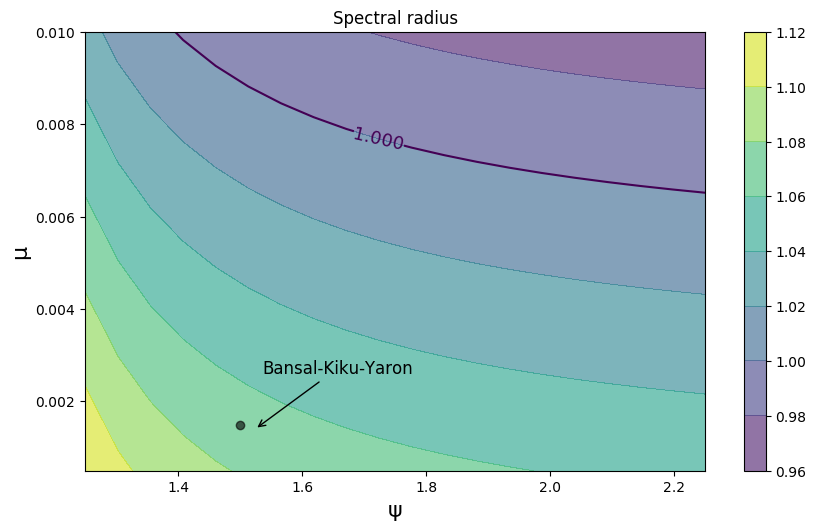

In [10]:
fig, ax = plt.subplots(figsize=(10, 5.7))

#lvs = [0.0, 0.8, 1.0, 1.4, 1.8, 2.2, 4.4]
#cls = [cm.jet(i) for i in np.linspace(0.4, 1, len(lvs))]

cs1 = ax[:contourf](x_vals, 
                    y_vals, 
                    R',
                    alpha=0.6)
                    #levels=lvs,


ctr1 = ax[:contour](x_vals, 
                    y_vals, 
                    R', 
                    levels=[1.0])

plt.clabel(ctr1, inline=1, fontsize=13)
plt.colorbar(cs1, ax=ax)

ax[:set_title]("Spectral radius")
ax[:set_xlabel]("ψ", fontsize=16)
ax[:set_ylabel]("μ", fontsize=16)


ax[:annotate]("Bansal-Kiku-Yaron", 
         xy=(1.5 + 0.024, 0.0015 - 0.0001),  
         xycoords="data",
         xytext=(5, 40),
         textcoords="offset points",
         fontsize=12,
         arrowprops=Dict("arrowstyle" => "->"))

ax[:plot]([1.5], [0.0015],  "ko", alpha=0.6)

plt.savefig("bky.pdf")
plt.show()